#Libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset path Shrey

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/research_methodology/heart.csv')
df = df.sample(frac = 1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


#Data Preprocessing

In [ ]:
print(len(df))
df = df.dropna()
print(len(df))

303
303


In [ ]:
df.shape

(303, 14)

#Data Normalization......... Converting dataset values between 0-1 because it  maintain the general distribution and ratios in the source data..


In [ ]:
def normalization(data):
  x_min = min(data)
  x_max = max(data)
  
  norm_x1 = []
  
  for i in data:
    j = (i - x_min)/(x_max - x_min)
    norm_x1.append(j)
  return norm_x1

In [ ]:
age = normalization(df['age'])
sex = df['sex']
cp = normalization(df['cp'])
trestbps = normalization(df['trestbps'])
chol = normalization(df['chol'])
fbs = df['fbs']
restecg = df['restecg']
thalach = normalization(df['thalach'])
exang = df['exang']
oldpeak = normalization(df['oldpeak'])
slope = normalization(df['slope'])
ca = normalization(df['ca'])
thal = normalization(df['thal'])
target = df['target']

#creating dataframe

In [ ]:
dataset = np.hstack((
    np.vstack((age)),
    np.vstack((sex)),
    np.vstack((cp)),
    np.vstack((trestbps)),
    np.vstack((chol)),
    np.vstack((fbs)),
    np.vstack((restecg)),
    np.vstack((thalach)),
    np.vstack((exang)),
    np.vstack((oldpeak)),
    np.vstack((slope)),
    np.vstack((ca)),
    np.vstack((thal)),
    np.vstack((target))
))

In [ ]:
df = pd.DataFrame(dataset,columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target'])

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.687500,0.0,0.666667,0.339623,0.312785,0.0,1.0,0.198473,0.0,0.193548,0.5,0.25,1.000000,0.0
1,0.312500,1.0,0.333333,0.245283,0.312785,0.0,1.0,0.778626,0.0,0.000000,1.0,0.00,1.000000,1.0
2,0.458333,0.0,0.666667,0.339623,0.296804,0.0,0.0,0.595420,0.0,0.080645,1.0,0.00,0.666667,1.0
3,0.708333,1.0,0.000000,0.339623,0.465753,1.0,0.0,0.465649,1.0,0.290323,1.0,0.75,1.000000,0.0
4,0.770833,1.0,0.000000,0.169811,0.196347,0.0,0.0,0.465649,1.0,0.016129,1.0,0.25,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.479167,1.0,0.333333,0.245283,0.454338,0.0,1.0,0.770992,0.0,0.032258,1.0,0.00,0.666667,1.0
299,0.520833,1.0,0.666667,0.292453,0.335616,0.0,0.0,0.618321,0.0,0.080645,0.0,0.25,0.666667,1.0
300,0.250000,0.0,0.666667,0.169811,0.324201,0.0,0.0,0.770992,1.0,0.000000,1.0,0.00,0.666667,1.0
301,0.000000,1.0,0.333333,0.339623,0.178082,0.0,0.0,1.000000,0.0,0.000000,1.0,0.00,0.666667,1.0


In [ ]:
X = df.iloc[:,:-1]
y = df['target']

#All classifiers

In [ ]:
def classifiers(classifier,test_size):

  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_size, random_state = None)

  if classifier == 'gnb' or classifier == 'gaussian_naivebayes':
    
    gaussain_naivebayes = GaussianNB()
    gaussain_naivebayes.fit(X_train,y_train)
    y_pred_gnb = gaussain_naivebayes.predict(X_test)

    print('Gaussian Naive Bayes classification report')
    print(classification_report(y_test,y_pred_gnb))
  
    print('\n\nGaussian Naive Bayes Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test,y_pred_gnb), annot=True, fmt='g', cmap='Blues')

  elif classifier == 'svm' or classifier == 'SVM':
    # X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X,y,test_size = test_size, random_state = 121)
    svm = LinearSVC()
    svm.fit(X_train,y_train)
    y_pred_svm = svm.predict(X_test)

    print('SVM')
    print(classification_report(y_test,y_pred_svm))
  
    print('\n\nSVM Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test,y_pred_svm), annot=True, fmt='g', cmap='Blues')

  elif classifier == 'lr':
   
    # X_train_lr,X_test_lr, y_train_lr,y_test_lr = train_test_split(X,y,test_size = test_size,random_state = 0)
   
    clf = LogisticRegression(random_state=0).fit(X_train,y_train)
    y_pred_lr = clf.predict(X_test)
    print('Logistic Regression')
    print(classification_report(y_test,y_pred_lr))

    print('\n\nLogistic regression Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True, fmt='g', cmap='Blues')

  elif classifier == 'xgboost' or classifier == 'xgb':

    # X_train_xgb,X_test_xgb, y_train_xgb,y_test_xgb = train_test_split(X,y,test_size = test_size,random_state = 7)

    xgb = XGBClassifier()
    xgb.fit(X_train,y_train)
    y_pred_xgb = xgb.predict(X_test)

    print('XGB')
    print(classification_report(y_test,y_pred_xgb))

    print('\n\nXGBoost Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True, fmt='g', cmap='Blues')

  elif classifier == 'knn' or classifier == 'KNN':
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)

    print('KNN classification report')
    print(classification_report(y_test,y_pred_knn))
    print('\n\nKNN Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True, fmt='g', cmap='Blues')
  

SVM
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74        23
         1.0       0.84      0.84      0.84        38

    accuracy                           0.80        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



SVM Confusion Matrix


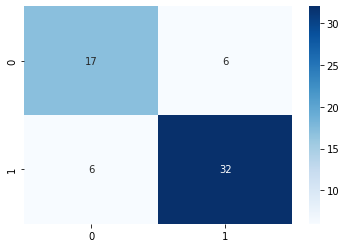

In [ ]:
classifiers('svm',0.2)

#Machine learning & neural net

In [ ]:
# Activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def derivativeSigmoid(x):
  return np.exp(-x) / ((np.exp(-x) + 1) ** 2)

In [ ]:
data = df.iloc[0:242,:]
data.shape

(242, 14)

In [ ]:
data2 = data.T
# shuffle_data = data2[:,np.random.permutation(data2.shape[1])]
data2 = data2.to_numpy()

# Linear Model Perceptron

In [ ]:
def linear_model():
  true_predict = 0
  w = np.zeros([14,1])
  bias = np.random.rand(1,1)
  lr = 0.3
  errors = 0
  mse = []
  epochs = 100
  for epoch in range(0,epochs):
    shuffle_data = data2[:,np.random.permutation(data2.shape[1])]
    true_predict = 0
    errors = 0 
    e = np.zeros((data2.shape[1],1))

    for i in range(0,data2.shape[1]):

      # Merging 1 to training data
      x =  np.vstack((1,shuffle_data[0:13, i].reshape(13,1)))
      
      train_y = shuffle_data[-1,i]
    
      # Activation function applie
      y_hat = np.sign((w.T @ x))
      y2 = -1
      if train_y == 0:
        train_y = y2

      error = train_y - y_hat

      # Collecing error for single epoch
      e[i] = error
      w  = w + (lr * error * x)
      bias = lr * error
      if y_hat ==  train_y:
        
        true_predict += 1
      else :
        errors += 1
    # Finding the mean square error     
    mse.append(np.average(e**2))
    # print('accuracy : '+ str(true_predict/data2.shape[1]))

    
  plt.xlabel('Learning curve')
  plt.title('learning curve')
  plt.ylabel('MSE')
  plt.plot(range(epochs),mse) 

  # Testing 
  true_prediction = 0
  data_test = df.iloc[243:303,:]
  data_test = data_test.to_numpy()
  data_test = data_test.T
  for i in range(data_test.shape[1]):
    test_x =  np.vstack((1,data_test[0:13, i].reshape(13,1)))
    test_y = data_test[-1,i]
    y_hat = np.sign((w.T @ test_x))

    y2 = -1
  
    if test_y == 0:
      test_y = -1
  
    if y_hat ==  test_y:
      true_prediction += 1
  # print(true_prediction)
  print('Perceptron of linear model result')
  print('Testing Accuracy: ' +str(true_prediction/data_test.shape[1] * 100))

#Backward Propagation

In [ ]:
def backwardPropagation():
  data = df.iloc[0:242,:]
  layer1_neuron = 50
  layer2_neuron = 50
  layer3_neuron = 50
  layer4_neuron = 50
  training_acc = 0
  eta1 = 0.6
  eta2 = 0.1
  eta3 = 0.09
  eta4 = 0.05
  eta5 = 0.01

  new_output = []

  weight1 = np.random.randn(data.shape[1] - 1,layer1_neuron)
  weight2 = np.random.randn(layer1_neuron,layer2_neuron)
  weight3 = np.random.randn(layer2_neuron,layer3_neuron)
  weight4 = np.random.randn(layer3_neuron,layer4_neuron)
  weight5 = np.random.randn(layer4_neuron,1)

  # initialize bias
  bias1 = np.random.randn(1, layer1_neuron)
  bias2 = np.random.randn(1, layer2_neuron)
  bias3 = np.random.randn(1, layer3_neuron)
  bias4 = np.random.randn(1, layer4_neuron)
  bias5 = np.random.randn(1, 1)

  for i in range(1,10000):
    new_output = []
    if i%50 == 0:
      # print(i,' iteration completed')
      
      shuffled_data = data.iloc[np.random.permutation(data.shape[0]), : ].to_numpy()

      # shuffle_seq = np.random.permutation(data.shape[0])  # numpy array of generated random values
      # shuffled_data = data[shuffle_seq, :]  # randomly select the rows from the train dataset

      inputData = shuffled_data[:, :-1]
      outputData = shuffled_data[:, -1].reshape(inputData.shape[0],1)

      pre1 = np.dot(inputData, weight1) + bias1
      output1 = sigmoid(pre1)
      
      pre2 = np.dot(output1, weight2) + bias2
      output2 = sigmoid(pre2)
      
      pre3 = np.dot(output2, weight3) + bias3
      output3 = sigmoid(pre3)
      
      pre4 = np.dot(output3, weight4) + bias4
      output4 = sigmoid(pre4)
      
      pre5 = np.dot(output4, weight5) + bias5
      output5 = sigmoid(pre5)

      #------------------------------ Feed Forward output ----------------------------
      # print(output5)
      #-----------------------------Back Propagation --------------------------------
      deltaOutput5 = (output5 - outputData) * derivativeSigmoid(pre5)
        
      deltaOutput4 = deltaOutput5.dot(weight5.T) * derivativeSigmoid(pre4)
    
      deltaOutput3 = deltaOutput4.dot(weight4.T) * derivativeSigmoid(pre3)
    
      deltaOutput2 = deltaOutput3.dot(weight3.T) * derivativeSigmoid(pre2)

      deltaOutput1 = deltaOutput2.dot(weight2.T) * derivativeSigmoid(pre1)
    
      N = outputData.size

      
      weight1 -= eta1 * ((inputData.T @ deltaOutput1)/N)
      weight2 -= eta2 * ((output1.T @ deltaOutput2)/N)
      weight3 -= eta3 * ((output2.T @ deltaOutput3)/N)
      weight4 -= eta4 * ((output3.T @ deltaOutput4)/N)
      weight5 -= eta5 * ((output4.T @ deltaOutput5)/N)

      listofweight = [weight1,weight2,weight3,weight4,weight5]
      listofbias = [bias1,bias2,bias3,bias4,bias5]

      for i in output5:
        if i[0] > 0.5:
          new_output.append([1.])
        else:
          new_output.append([0.])
      # new_output = np.array(new_output)
      diff = outputData - new_output
      diff = diff ** 2
      numberofone = (diff==1).sum()
  training_acc  = ((1-(numberofone/outputData.shape[0]))*100)
  print("Training Accuracy ----> ",((1-(numberofone/outputData.shape[0]))*100), "%")

      # return listofweight ,listofbias

  data_test = df.iloc[243:303,:]
  data = data_test.to_numpy()

  inputData = data[:, :-1]
  outputData = data[:, -1].reshape(inputData.shape[0], 1)

  new_output = []


  output1 = sigmoid(np.matmul(inputData, weight1) + bias1)
  output2 = sigmoid(np.matmul(output1, weight2) + bias2)
  output3 = sigmoid(np.matmul(output2, weight3) + bias3)
  output4 = sigmoid(np.matmul(output3, weight4) + bias4)
  output5 = sigmoid(np.matmul(output4, weight5) + bias5)
  # print(output5)

  for i in output5:
    if i[0] > 0.5:
        new_output.append([1.])
    else:
        new_output.append([0.])
  new_output = np.array(new_output)
  diff = outputData - new_output
  diff = diff ** 2
  numberofone = (diff==1).sum()
  print("Testing Accuracy ----> ",((1-(numberofone/outputData.shape[0]))*100), "%")

In [ ]:
def neuralNet(algorithm):
   
  if algorithm == 'perceptron' or algorithm == 'linear_model':
    linear_model()  
   
  elif algorithm == 'backwardpropagation' or algorithm == 'bp':
    print('Backward Propagation Results')
    backwardPropagation()

In [ ]:
neuralNet('bp')

Backward Propagation Results
Training Accuracy ---->  92.97520661157024 %
Testing Accuracy ---->  81.66666666666667 %


# Linear model perceptron

Perceptron of linear model result
Testing Accuracy: 76.66666666666667


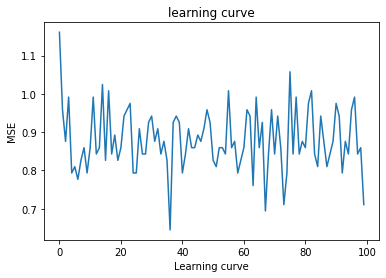

In [ ]:
neuralNet('perceptron')